<a href="https://colab.research.google.com/github/aqsa-bhutto07/aqsa-bhutto07/blob/main/Lung_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
!unzip 'lung cancer.zip'

Archive:  lung cancer.zip
  inflating: lung_cancer_examples.csv  


In [4]:
df=pd.read_csv('lung_cancer_examples.csv')

In [5]:
df

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1
5,Cristiano,Ronaldo,34,0,10,0,0
6,Mihail,Tal,58,15,10,0,0
7,Kathy,Bates,22,12,5,2,0
8,Nicole,Kidman,45,2,6,0,0
9,Ray,Milland,52,18,4,5,1


In [6]:
df.shape

(59, 7)

In [7]:
df.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [8]:
df.describe()

,Age,Smokes,AreaQ,Alkhol,Result
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,42.627119,15.067797,5.203390,3.237288,0.474576
std,16.235230,7.984607,2.461984,2.380517,0.503640
min,18.000000,0.000000,1.000000,0.000000,0.000000
25%,29.000000,10.000000,3.000000,1.000000,0.000000
50%,39.000000,15.000000,5.000000,3.000000,0.000000
75%,55.000000,20.000000,7.500000,5.000000,1.000000
max,77.000000,34.000000,10.000000,8.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     59 non-null     object
 1   Surname  59 non-null     object
 2   Age      59 non-null     int64 
 3   Smokes   59 non-null     int64 
 4   AreaQ    59 non-null     int64 
 5   Alkhol   59 non-null     int64 
 6   Result   59 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.4+ KB


In [10]:
df.duplicated().sum()

np.int64(0)

# Data Imbalance

In [11]:
df['Result'].value_counts()

,count
Result,
0,31
1,28


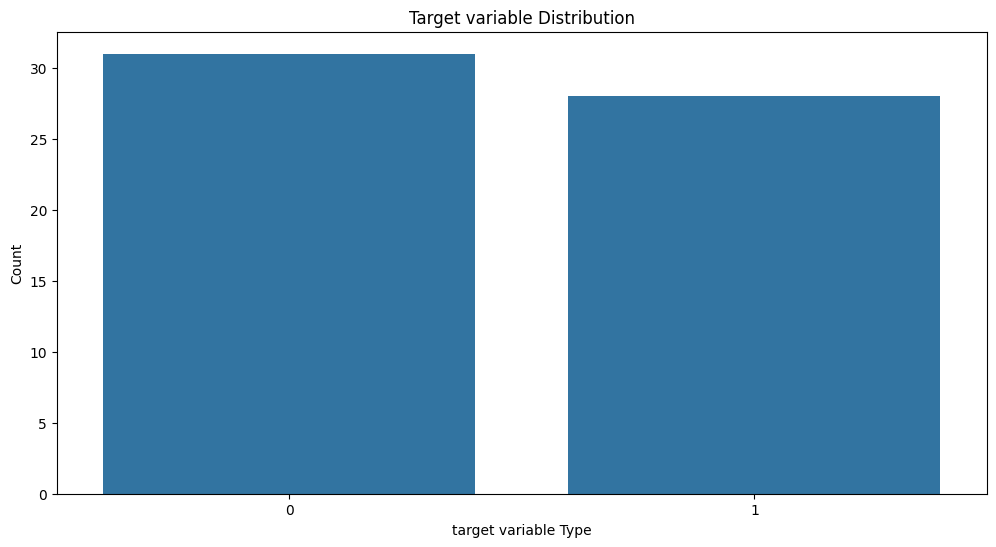

<Figure size 640x480 with 0 Axes>

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Result', data=df)
plt.title('Target variable Distribution')
plt.xlabel('target variable Type')
plt.ylabel('Count')
plt.show()
plt.savefig('Target variable distribution.png')

# Data Exploration

In [13]:
df.nunique()

,0
Name,49
Surname,49
Age,37
Smokes,16
AreaQ,10
Alkhol,9
Result,2


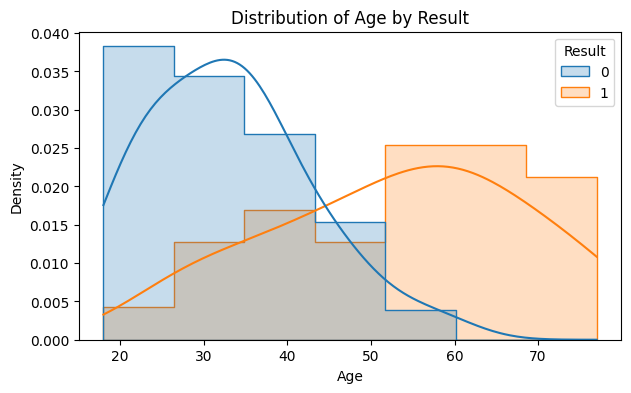

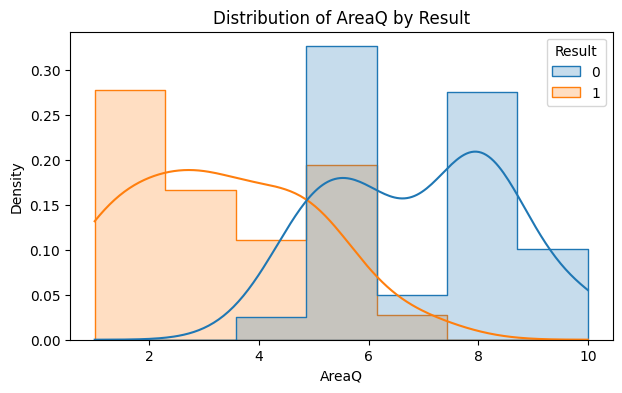

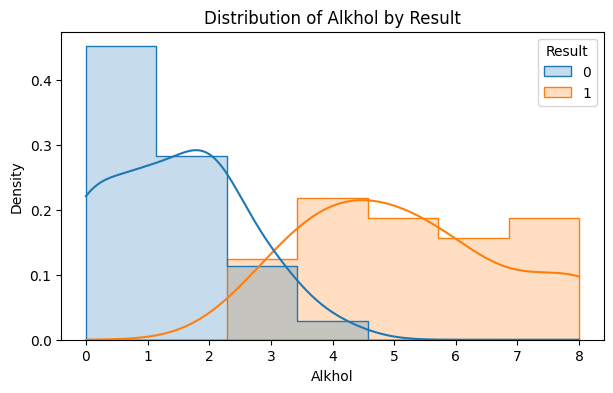

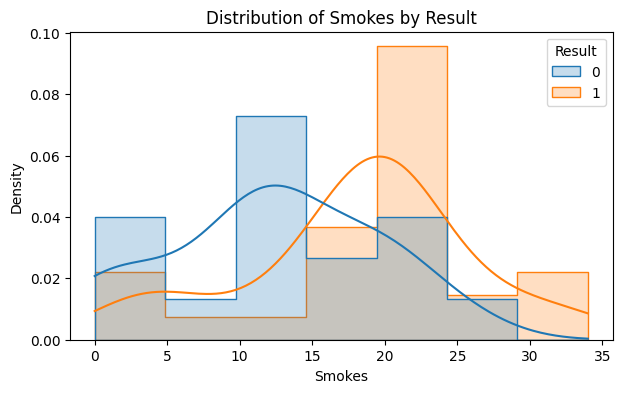

In [14]:
num_cols = ["Age", "AreaQ", "Alkhol", "Smokes"]
for col in num_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(data=df, x=col, hue="Result", kde=True, element="step", stat="density", common_norm=False)
    plt.title(f"Distribution of {col} by Result")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

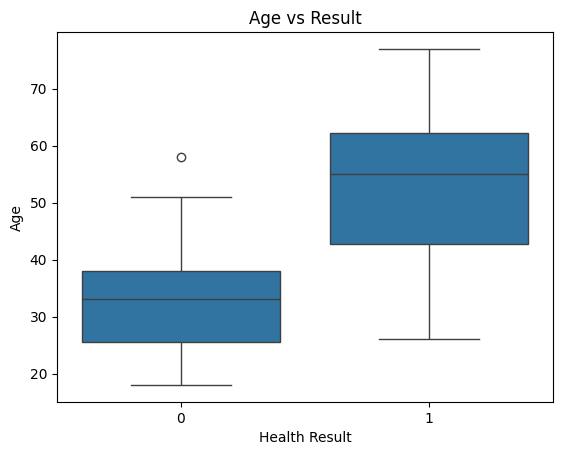

In [15]:
sns.boxplot(x='Result', y='Age', data=df)
plt.title('Age vs Result')
plt.xlabel('Health Result')
plt.ylabel('Age')
plt.show()

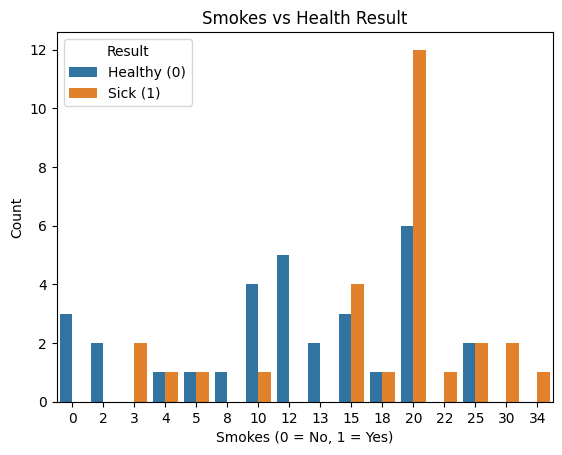

In [16]:
sns.countplot(x='Smokes', hue='Result', data=df)
plt.title('Smokes vs Health Result')
plt.xlabel('Smokes (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Result', labels=['Healthy (0)', 'Sick (1)'])
plt.show()

# Predictive Model

In [17]:
x=df.iloc[:,2:6].values
y=df.iloc[:,-1].values

# Split Data in Train, Test, Validation Set

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=10,shuffle=True)

# KNN Model

In [19]:
k_range=range(1,31)
cv_scores=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())

best_k=k_range[cv_scores.index(max(cv_scores))]
best_k

1

In [20]:
knn=KNeighborsClassifier(n_neighbors=3, metric="minkowski", p=2)

In [21]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
y_pred=knn.predict(x_test)

In [23]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm=confusion_matrix(y_test,y_pred)

cm

array([[5, 0],
       [0, 1]])

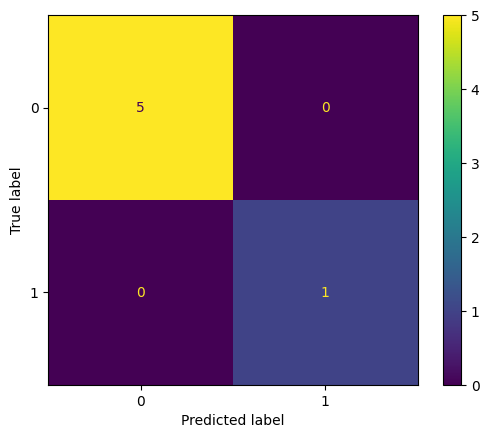

In [24]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [25]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

1.0